<a href="https://colab.research.google.com/github/Noor72353/Iris_ML_Project/blob/main/iris_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Machine Learning Project

## Abstract
This project uses the Iris dataset to build a simple machine learning model for classification.
We explore the data, train a Logistic Regression model, and visualize the results.

## Step 1: Import Libraries
All necessary Python libraries are imported, including pandas, numpy, scikit-learn, matplotlib, and seaborn.

## Step 2: Load and Explore Dataset
The Iris dataset is loaded from scikit-learn and converted to a pandas DataFrame.
Basic info, statistical summary, and target class counts are displayed.

## Step 3: Preprocess Data
The dataset is split into training and testing sets. Features are scaled using StandardScaler.

## Step 4: Train Model
Logistic Regression is used to train the model on the training set. Accuracy and classification report are printed.

## Step 5: Visualizations
Pairplots, class counts, and scatter plots show feature relationships and distribution of classes.

## Step 6: Conclusion
The model achieves around 93% accuracy, demonstrating that Logistic Regression can classify Iris flowers effectively.


In [11]:
# Data manipulation
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris dataset
iris = load_iris()

# Convert to pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Check the first 5 rows
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


Statistical Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%          

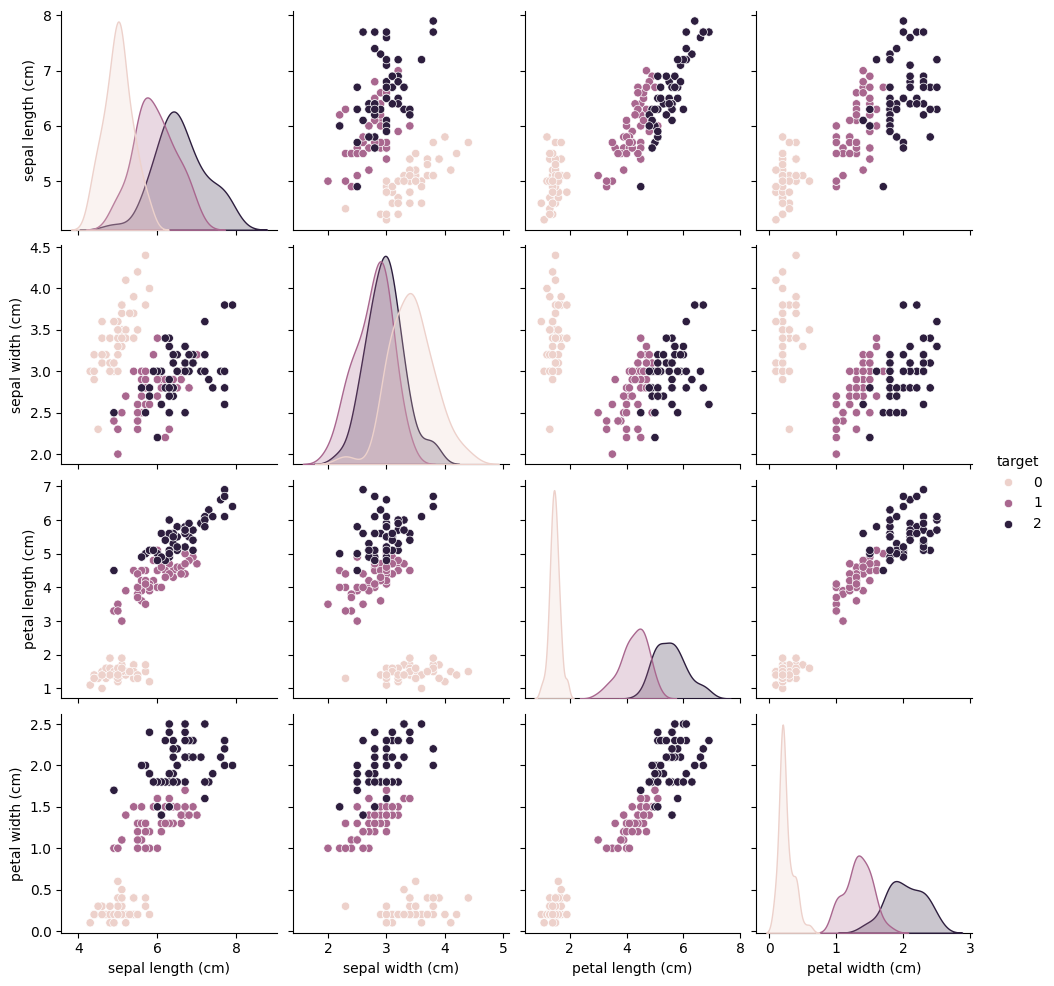

In [12]:
# ===== Data Exploration =====

# Basic info about the dataset
print("Dataset Info:")
print(df.info())
print("\n")

# Statistical summary
print("Statistical Summary:")
print(df.describe())
print("\n")

# Count of each class in target
print("Target Value Counts:")
print(df['target'].value_counts())

# Pairplot to visualize feature relationships
sns.pairplot(df, hue='target', diag_kind='kde')
plt.show()



In [14]:
# ===== Step 3: Split the Dataset =====

# Features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# ===== Step 3.1: Scale Features =====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check first 5 rows of scaled features
pd.DataFrame(X_train_scaled, columns=X.columns).head()


Training samples: 120, Testing samples: 30


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.721568,-0.332101,-1.345722,-1.323276
1,-1.124492,-1.227655,0.414505,0.651763
2,1.144395,-0.555990,0.584850,0.256755
3,-1.124492,0.115676,-1.288941,-1.454945
4,-0.408002,-1.227655,0.130598,0.125086


In [15]:
# ===== Step 4: Train Logistic Regression Model =====

# Initialize the model
model = LogisticRegression(random_state=42, max_iter=200)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy*100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy on test data: 93.33%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



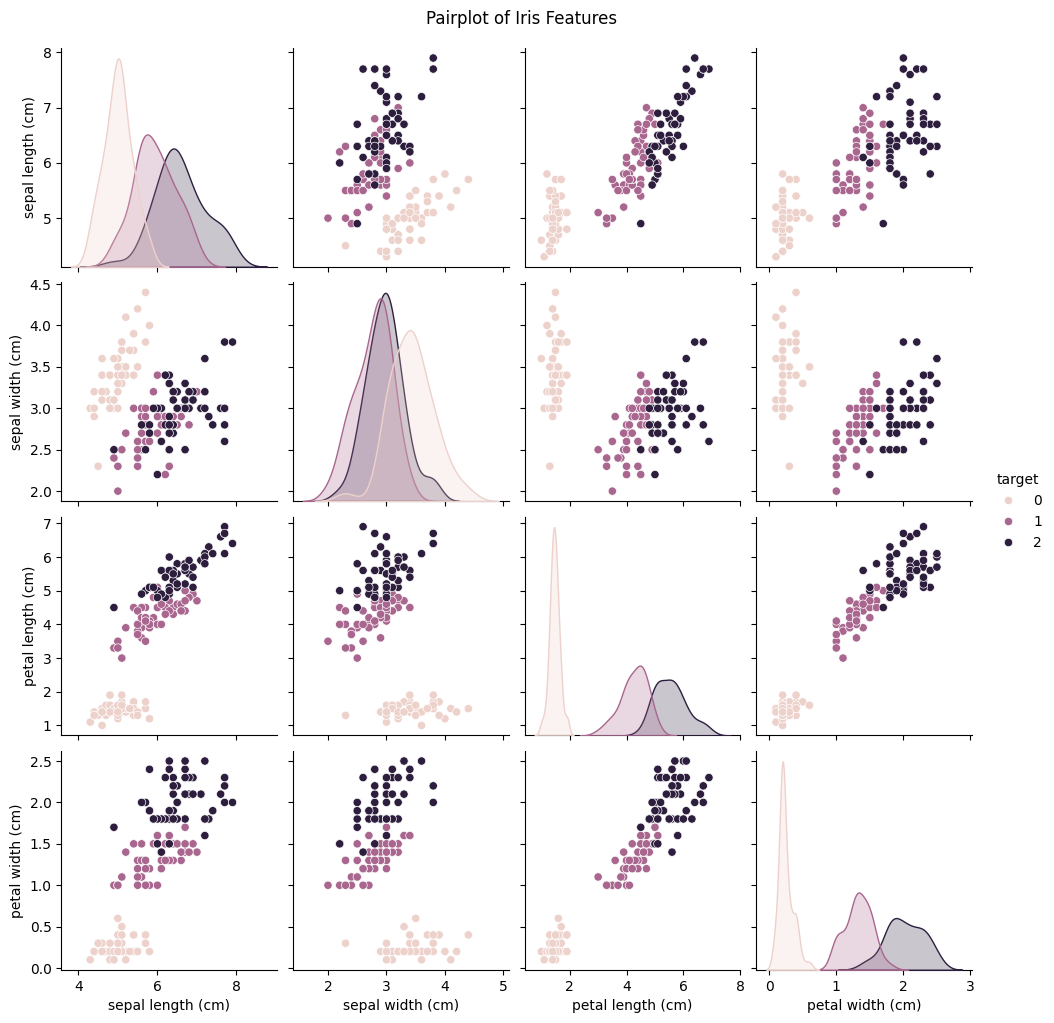

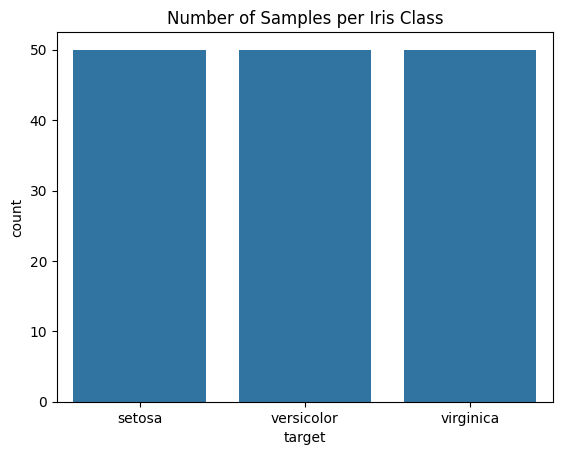

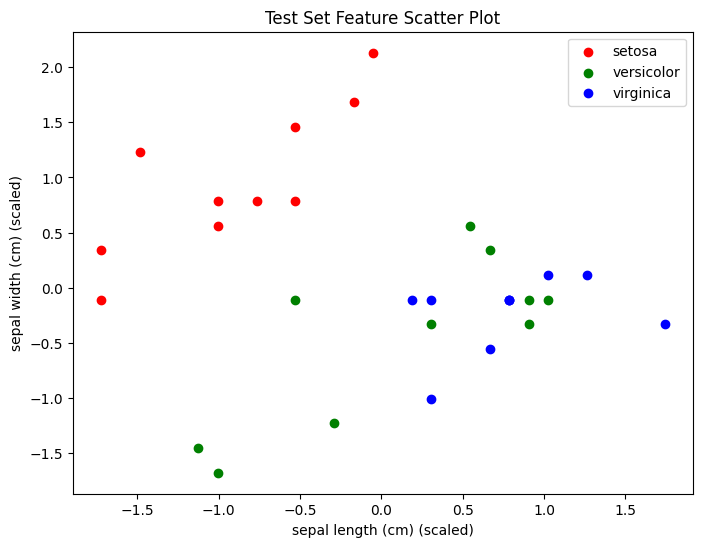

In [16]:
# ===== Step 5: Visualizations =====

# 1️⃣ Pairplot colored by target
sns.pairplot(df, hue='target', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# 2️⃣ Count of each class
sns.countplot(x='target', data=df)
plt.title("Number of Samples per Iris Class")
plt.xticks(ticks=[0,1,2], labels=iris.target_names)
plt.show()

# 3️⃣ Scatter plot of first two features (for visualization)
plt.figure(figsize=(8,6))
for t, c, label in zip([0,1,2], ['red', 'green', 'blue'], iris.target_names):
    plt.scatter(
        X_test_scaled[y_test==t, 0],
        X_test_scaled[y_test==t, 1],
        c=c, label=label
    )
plt.xlabel(iris.feature_names[0] + " (scaled)")
plt.ylabel(iris.feature_names[1] + " (scaled)")
plt.title("Test Set Feature Scatter Plot")
plt.legend()
plt.show()
